

# Predicting the Heating Load and Cooling Load requirements for building using multi-class classification or Regression 

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------



## 1. Problem Definition
> Predict the energy efficiency in terms of `Heating Load` and `Cooling Load` from a given building, given Attributes, orientation and geometry of a building.

## 2. Data
The data is downloaded from Kaggle:
https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set

## 3. Evaluation 
Depeding on whether the problem is treated as Regression or Multi-Classfication:
Evaluation would be done with:

`Multiclassfication:` 
- Accuracy
- Precision
- Recall
- F1 Score
- ROC Curve

`Regression:`
- R2 Score
- MAE
- MSE

## 4. Features
There are a total of 8 features for the prediction of 2 y-value
- RelativeCompactness
- SurfaceArea
- WallArea
- RoofArea
- OverallHeight
- Orientation
- GlazingArea
- GlazingAreaDistribution

Predict:
- HeatingLoad
- CoolingLoad

## 0. Understanding the Data

In [1]:
#Setting up and importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

%matplotlib inline

In [2]:
df = pd.read_csv('data/energy_efficiency_data.csv')

In [3]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.head(10)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


# df.info()

In [5]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Since the data are all in floats and has no missing values, there's no need to clean the data.

## Histogram of the features 

Finding out the data distribution and whether they are continous

In [6]:
type(df.columns)

pandas.core.indexes.base.Index

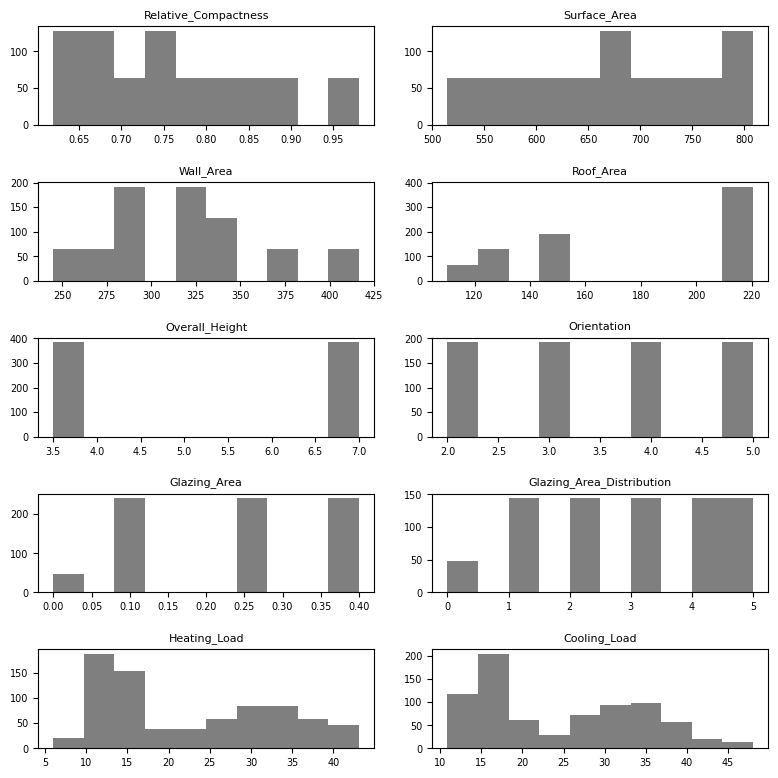

In [7]:
feature_list = list(df.columns)
fig,axs = plt.subplots(5,2, figsize = (8,8))

k = 0

for i in range(5):
    for j in range(2):
        axs[i,j].set_title(feature_list[k], fontsize= 8 )
        axs[i,j].hist(x = df[feature_list[k]], alpha = 0.5, color = 'black')
        axs[i,j].tick_params(labelsize = 7)
        k +=1


fig.tight_layout(pad = 1.5)

## Chart plot for certain features
Trying to understand the linear relationship between the features and the two labels with
- Correlation Matrix
- Chat plot with some of the features.

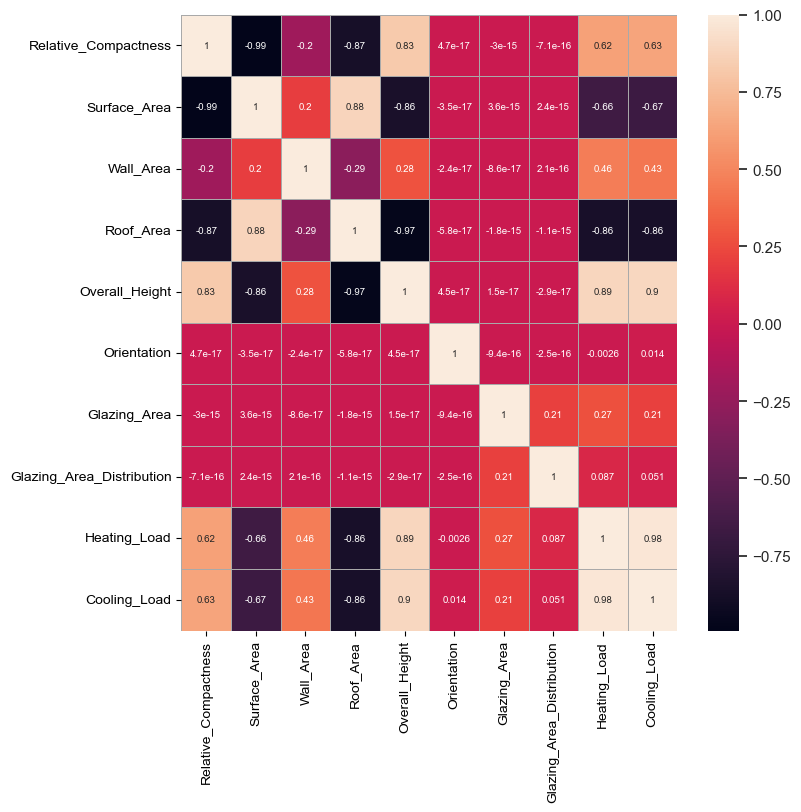

In [8]:
#Spliting the data 
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale= 1)
plt = sns.heatmap(df.corr(), annot = True, cbar = True, linecolor = 'darkgrey', linewidth= 0.5, annot_kws= {'size':7})

from the above correlation matrix, you can see some of the features affect Heating and Cooling_load more
for examples:
- Overall_Height (Positive Correlation)
- Relative Compactness (Positive Correlation)
- Surface Area(Neagtive Correlation)
- Roof Area(Neagtive Correlation))

In [9]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

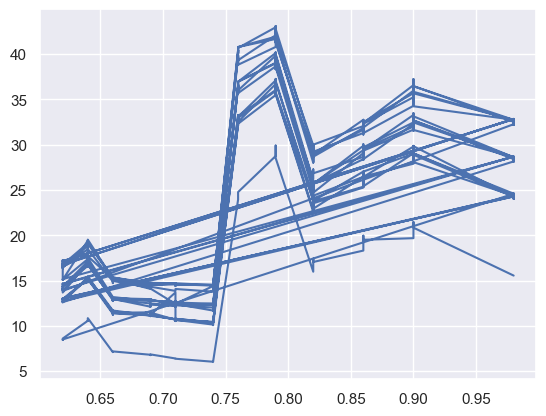

In [22]:
import matplotlib.pyplot as plt
plt.plot(df['Relative_Compactness'],df['Heating_Load'])
plt.show()

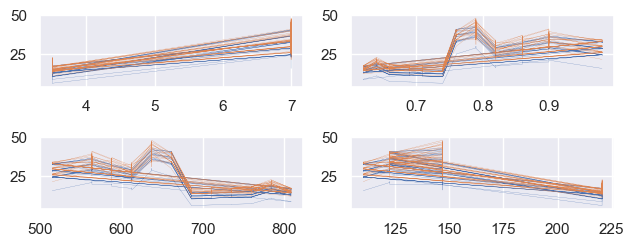

In [11]:
# # #Chart for certain features
import matplotlib.pyplot as plt
key_list =['Overall_Height', 'Relative_Compactness', 'Surface_Area', 'Roof_Area']
k = 0

for i in key_list:
    plt.subplot(4,2,k+1)
    plt.plot(df[i], df['Heating_Load'], linewidth = 0.15)
    plt.plot(df[i], df['Cooling_Load'],linewidth = 0.15)
    k+=1
    
plt.tight_layout()

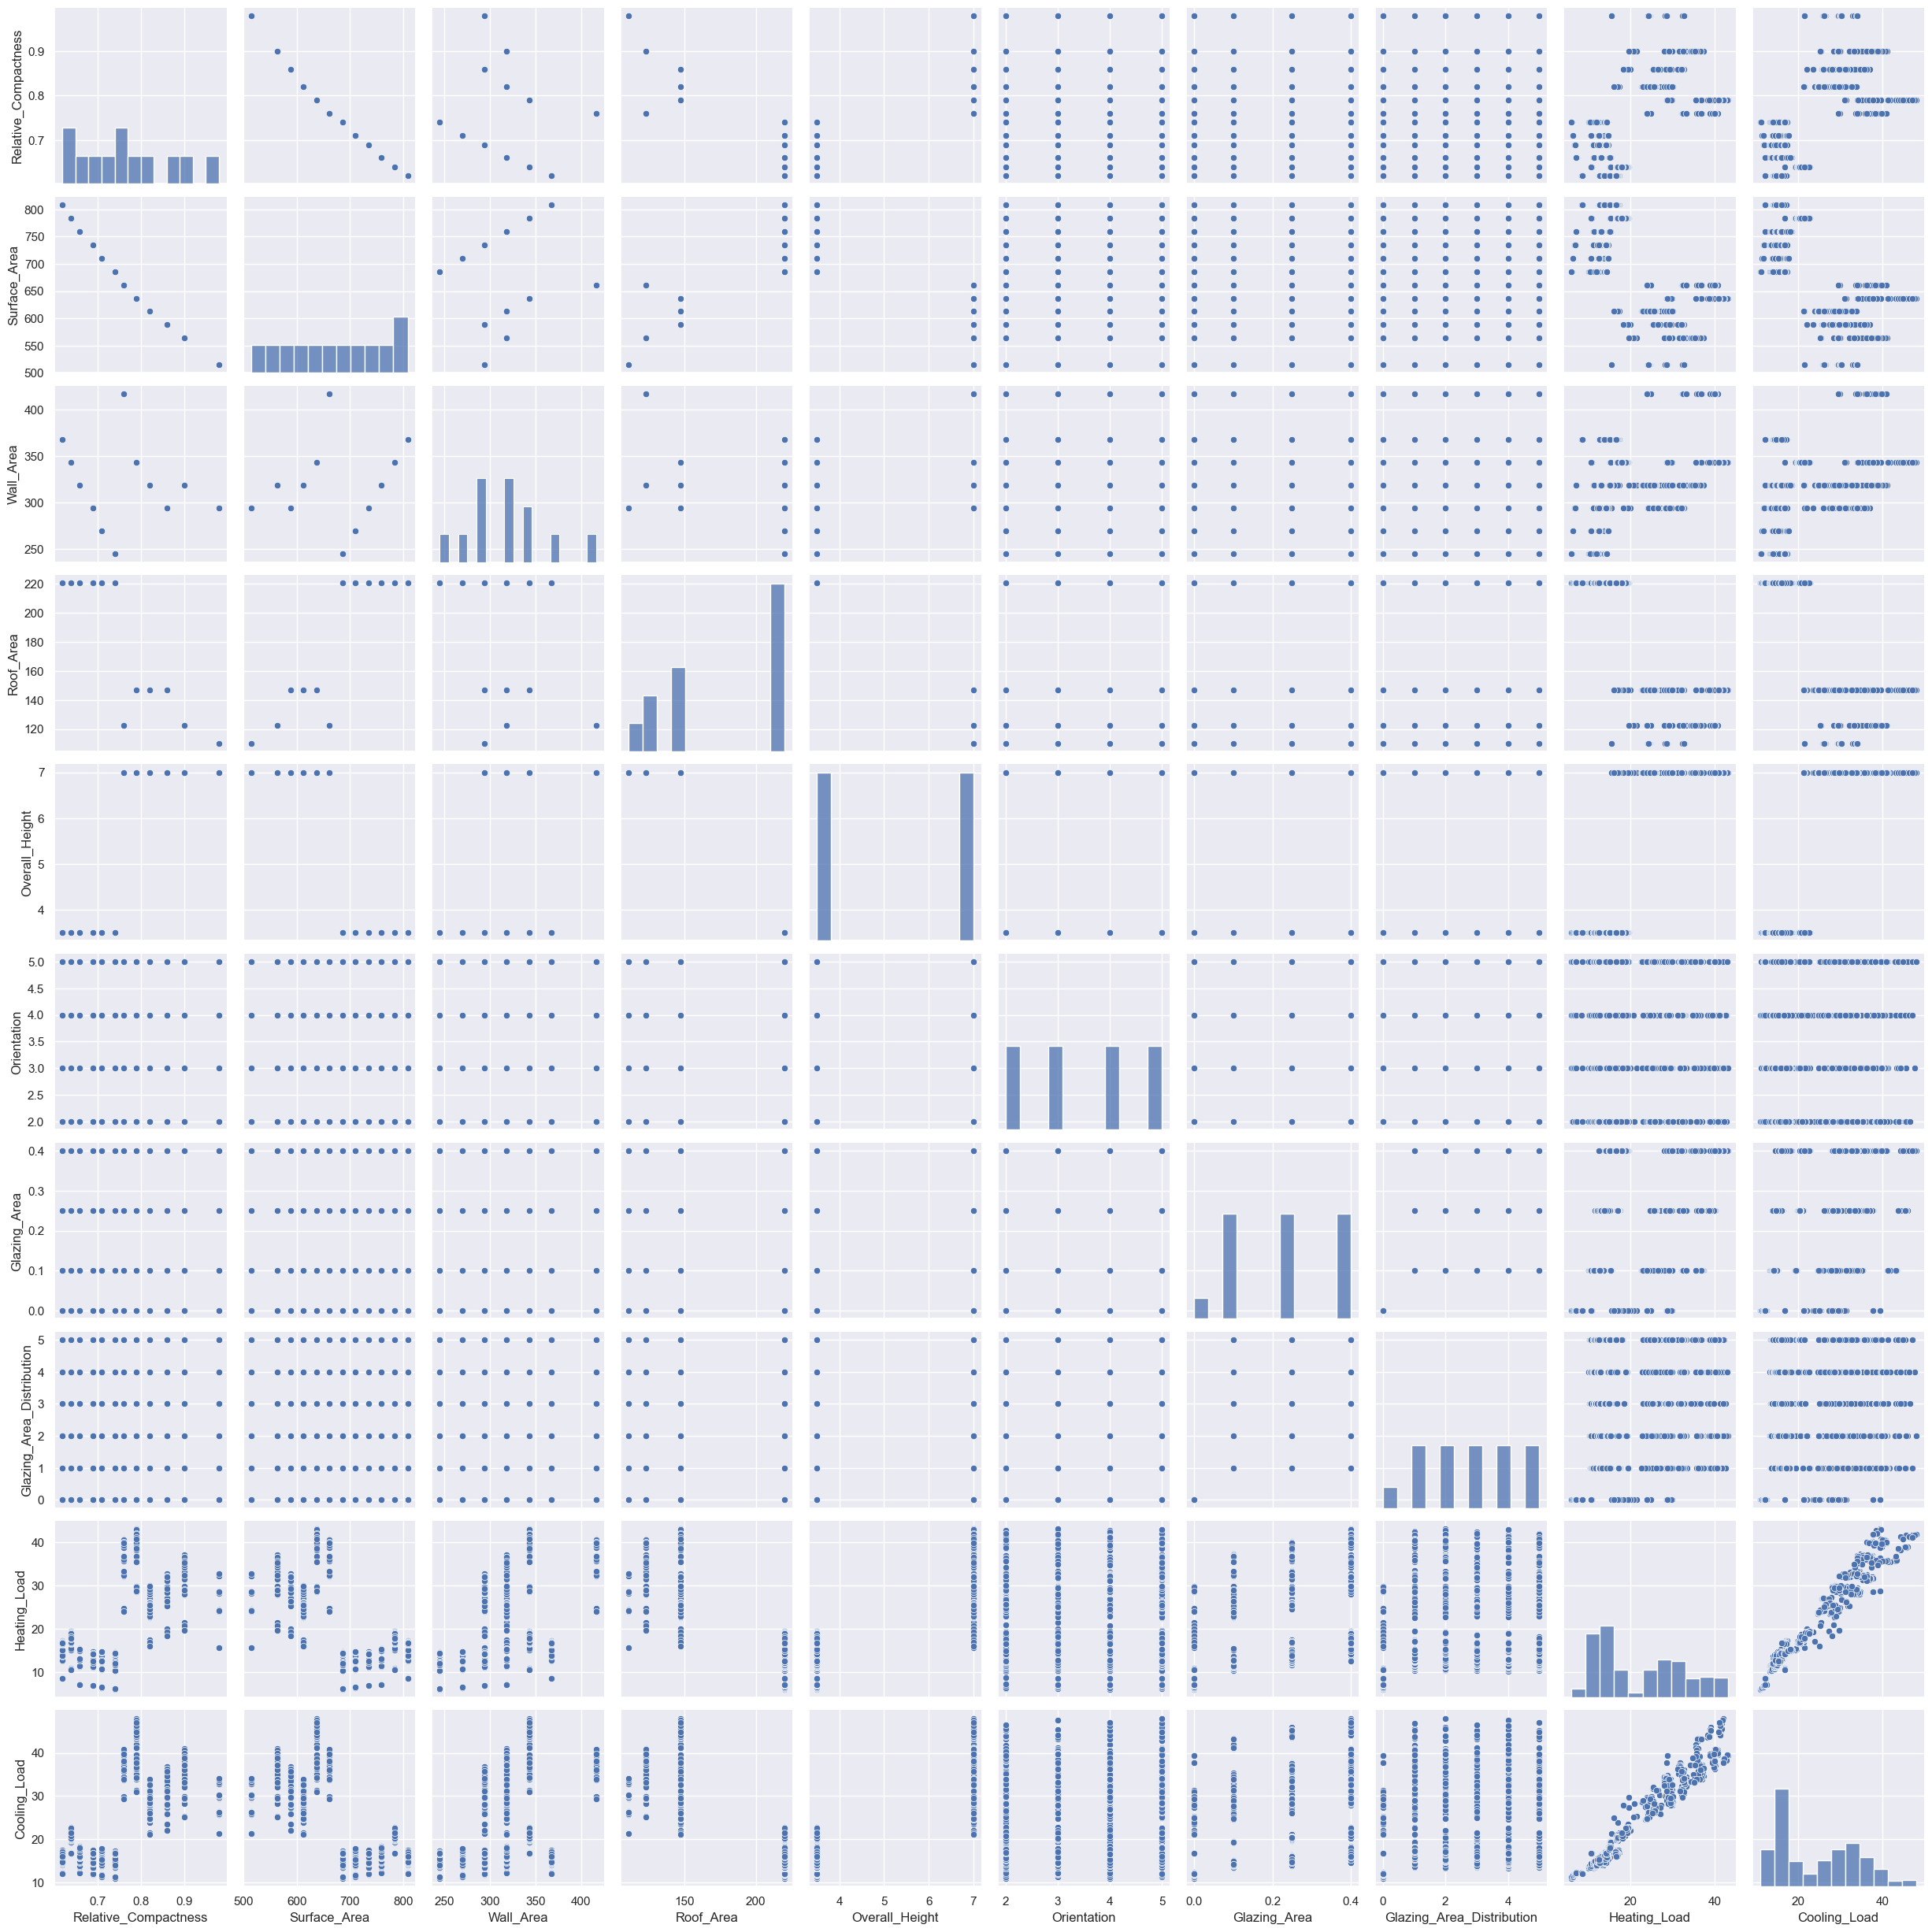

In [12]:
#Turn the dataframe feature into multi class categorical
sns.pairplot(df)

In [13]:
df.shape

(768, 10)

In [14]:
df.head(5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## ML: Treating the model as Regression

In [15]:
#List of Regression methods
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import svm, linear_model
from sklearn.neural_network import MLPRegressor

In [16]:
#Splitting the data
X = df.drop(['Heating_Load', 'Cooling_Load'], axis =1)
y_0, y_1 = df['Heating_Load'], df['Cooling_Load']

x_train, x_test, y0_train, y0_test = train_test_split(X,
                                                   y_0,
                                                   test_size = 0.2)

In [17]:
#Create Evaluation function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
def reg_eval(model, x_test, y_true = y0_test):
    
    y_pred = model.predict(x_test)
    dict = {}
    dict['R2'] = r2_score(y_true, y_pred)
    dict['MAE'] = mean_absolute_error(y_true, y_pred)
    dict['MSE'] = mean_squared_error(y_true, y_pred)
    dict['MSElog'] = mean_squared_log_error(y_true,y_pred)
    return dict

In [29]:
#RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators = 100,
                               random_state = 42)
model_RF.fit(x_train, y0_train)

reg_eval(model_RF, x_test, y0_test)

{'R2': 0.9969658024023855,
 'MAE': 0.3213227272727269,
 'MSE': 0.30176176058441484,
 'MSElog': 0.0005314817817231224}

In [19]:
#GradientBoostingRegressor
#Gradient boosting is a technique which uses multiple weak models to produce a strong model.
#The idea is to iteratively add weak models to the ensemble, each one trying to correct the mistakes made by the previous model

'''
The algorithem starts by fitting a simple base model, such as a decision tree 
and then calculate the difference between the true values and the prediction using differentiable los sfunction eg MSE/MAE.
It then trains another model which fits to the residual( the values/ labels) that the previous model did not predict well
this process is done iteratively and at the end all the models are combined to produce an ensemble model.
'''

model_GB = GradientBoostingRegressor(n_estimators = 100,
                                    learning_rate = 0.1,
                                    random_state = 42)

model_GB.fit(x_train, y0_train)

reg_eval(model_GB, x_test, y0_test)


{'R2': 0.9972955874832963,
 'MAE': 0.36991737148710374,
 'MSE': 0.26896345940972394,
 'MSElog': 0.0006440810889133361}

In [20]:
#AdaBoostRegressor
#Much Like Gradient Boosting, the ensemble method uses multiple weak models to produce a strong model.
#The idea is to give more weight to the instances that are misclassified by the weak models
#and iteratively fit new weak models to the reweighted data
'''
Ada starts with a simpler base model, it then calculate th loss using exponential loss function 
and then it adjust its weight on the features the current model fail to predict 
and tries to find other weak models which is just slightly better than random guessing to fit into the new reweighted data
After layer and layers of weak models, they are then all combined together to form an ensemble model
 
'''
model_AB = AdaBoostRegressor(n_estimators = 100,
                            learning_rate = 0.1,
                            random_state = 42)

model_AB.fit(x_train, y0_train)

reg_eval(model_AB, x_test, y0_test)

{'R2': 0.9463673995828226,
 'MAE': 1.7759841555927263,
 'MSE': 5.333953180680241,
 'MSElog': 0.00981314045121935}

Difference between ADA and Gradient
- Base models: AdaBoost uses simpler base models, such as decision trees of shallow depth, while Gradient Boosting uses more complex base models, such as decision trees of deeper depth or regression trees.

- Loss function: AdaBoost uses the exponential loss function to update the weights of the instances, while Gradient Boosting uses the gradient of a differentiable loss function, such as mean squared error or mean absolute error, to update the residuals.

- Weakness of base models: AdaBoost tries to find weak models that are only slightly better than random guessing, while Gradient Boosting tries to find models that are as good as possible at minimizing the loss function.

- Iterative optimization: AdaBoost uses an iterative optimization procedure to fit new weak models to the re-weighted data, while Gradient Boosting uses an iterative optimization procedure to fit new models to the residuals.

- Handling of outliers: AdaBoost is sensitive to outliers and can be affected by the presence of noisy instances, while Gradient Boosting can handle outliers and noisy instances better, as it fits models to the residuals, not the raw data.

In [21]:
#SVM

model_SVM = svm.SVR(kernel = 'linear')

model_SVM.fit(x_train, y0_train)

reg_eval(model_SVM, x_test, y0_test)

{'R2': 0.8494943113120006,
 'MAE': 2.7120667942982397,
 'MSE': 14.968326925104822,
 'MSElog': 0.023954147616734808}

In [24]:
#Ridge Regression L2 Regularisation

model_Ridge = linear_model.Ridge(alpha = 0.01)

model_Ridge.fit(x_train, y0_train)

reg_eval(model_Ridge, x_test, y0_test)

{'R2': 0.8932824772705924,
 'MAE': 2.302178951444381,
 'MSE': 10.613437822689049,
 'MSElog': 0.018174969118934785}

In [25]:
#Elastic Net Regression
model_Elast = linear_model.ElasticNet(0.01)

model_Elast.fit(x_train, y0_train)

reg_eval(model_Elast, x_test, y0_test)

{'R2': 0.8816176478657157,
 'MAE': 2.488652938437273,
 'MSE': 11.7735466636228,
 'MSElog': 0.020185188465916194}

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

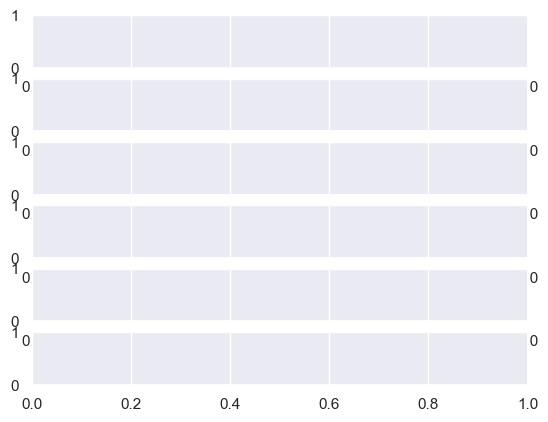

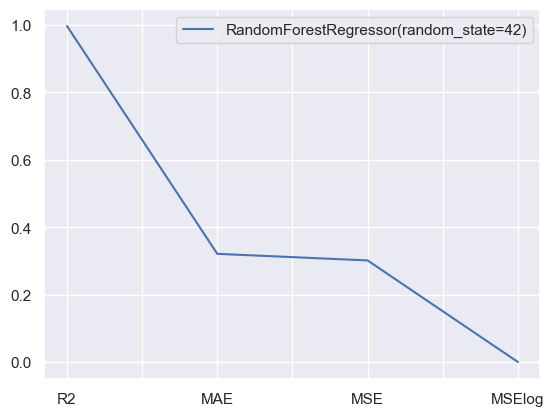

In [98]:
#Visualising the performance of the models

model_list = [model_RF, model_GB, model_AB, model_SVM, model_Ridge, model_Elast ]
model_df = pd.DataFrame()
k= 0
fig, ax = plt.subplots(6)

for model in model_list:
    model_df = pd.DataFrame(reg_eval(model, x_test, y0_test), index =[f'{model}'])
    model_df.T.plot().bar()
    k+=1

model_df
